In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bank_transactions_data_2.csv")
sample_df = df
sample_df.head()

,transaction_id,user_id,amount,transaction_type,device_type,location,time_of_day,transaction_hour,is_international,previous_transactions,failed_transactions,account_age_days,is_fraud,Date,Transaction Platform
0,T00001,U255,43574.75,online,tablet,Singapore,morning,9,1,115,Yes,35,0,04/09/2017,PhonePe
1,T00002,U661,104351.51,online,desktop,Singapore,night,1,1,15,Yes,598,1,18/02/2020,GPay
2,T00003,U325,211864.52,POS,tablet,Dubai,afternoon,13,1,135,Yes,550,1,29/05/2020,BharatPe
3,T00004,U327,280370.03,online,tablet,Kolkata,afternoon,15,0,129,Yes,42,1,18/07/2022,GPay
4,T00005,U143,216222.76,online,desktop,Delhi,evening,17,0,11,Yes,791,0,05/07/2021,BharatPe


In [152]:
#transaction_type, device_type, location,time_of_day, Date, user_id Transaction Platform,failed_transactions -> are not numerical values 
#needs to be converted to find their correlation value

In [153]:
location = df['location'].drop_duplicates(keep='first')
location

0     Singapore
2         Dubai
3       Kolkata
4         Delhi
5          Pune
6     Bangalore
8       Chennai
10     New York
17       Mumbai
38       London
Name: location, dtype: object

In [154]:
tr_plat = df['Transaction Platform'].drop_duplicates(keep='first')
tr_plat

0     PhonePe
1        GPay
2    BharatPe
6      Paypal
8      Others
9       Paytm
Name: Transaction Platform, dtype: object

In [155]:
tr_type = df['transaction_type'].drop_duplicates(keep='first')
tr_type

0      online
2         POS
5         ATM
6    transfer
Name: transaction_type, dtype: object

In [156]:
devices = df['device_type'].drop_duplicates(keep='first')
devices

0     tablet
1    desktop
5     mobile
Name: device_type, dtype: object

In [157]:
daytime = df['time_of_day'].drop_duplicates(keep='first')
daytime

0      morning
1        night
2    afternoon
4      evening
Name: time_of_day, dtype: object

In [158]:
f_trn = df['failed_transactions'].drop_duplicates(keep='first')
f_trn

0     Yes
16     No
Name: failed_transactions, dtype: object

In [159]:
#creating dictionaries for key-value mapping
location_map={
    'Singapore': 0,
    'Dubai': 1,
    'Kolkata': 2,
    'Delhi': 3,
    'Pune': 4,
    'Bangalore': 5,
    'Chennai': 6,
    'New York': 7,
    'Mumbai': 8,
    'London': 9
}

In [160]:
platforms={
    'PhonePe': 0,
    'GPay': 1,
    'BharatPe': 2,
    'Paypal': 3,
    'Paytm': 4,
    'Others': 5
}

In [161]:
trans_type={
    'online': 0,
    'POS': 1,
    'ATM': 2,
    'transfer': 3
}

In [162]:
dev_map={
    'tablet': 0,
    'desktop': 1,
    'mobile': 2
}

In [163]:
time_map={
    'morning': 0,
    'night': 1,
    'afternoon': 2,
    'evening': 3
}

In [164]:
failed_map={
    'Yes': 1,
    'No': 0
}

In [165]:
fraud_df = df[df['is_fraud'] == 1]
f_usr = fraud_df.drop_duplicates(keep='first')
f_usr['user_id'].value_counts()

user_id
U497    14
U585    14
U472    13
U376    13
U355    13
        ..
U716     1
U592     1
U714     1
U194     1
U238     1
Name: count, Length: 898, dtype: int64

In [166]:
top_user_fraud=(
    f_usr['user_id'].
        value_counts().
        sort_values(ascending=False).
        head(10)
)
l1 = list(map(str,top_user_fraud.index))
l2 = list(map(int,top_user_fraud.values))
User_Fraud = pd.DataFrame({
    'User': l1,
    'No. of Fraud Transactions': l2
})
User_Fraud

,User,No. of Fraud Transactions
0,U497,14
1,U585,14
2,U472,13
3,U376,13
4,U355,13
5,U983,13
6,U762,13
7,U684,13
8,U930,13
9,U147,13


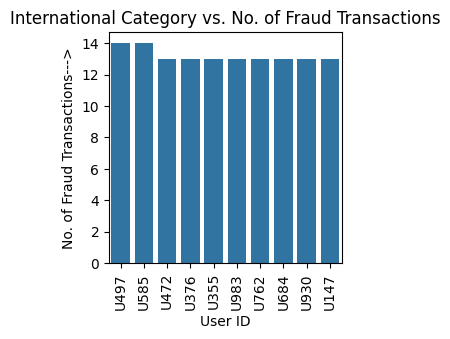

In [167]:
plt.figure(figsize=(3,3))
sns.barplot(x='User',y='No. of Fraud Transactions',data=User_Fraud)
plt.title('International Category vs. No. of Fraud Transactions')
plt.xlabel('User ID')
plt.ylabel('No. of Fraud Transactions--->')
plt.xticks(rotation='vertical')
plt.show()

In [168]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
le = LabelEncoder()
sample_df['user_id_encoded'] = le.fit_transform(sample_df['user_id'])
sample_df[['user_id','user_id_encoded']]

,user_id,user_id_encoded
0,U255,155
1,U661,561
2,U325,225
3,U327,227
4,U143,43
...,...,...
9995,U591,491
9996,U744,644
9997,U956,856
9998,U408,308


In [169]:
sample_df['location'] = sample_df['location'].map(location_map)
print(sample_df['location'].head(10))

0    0
1    0
2    1
3    2
4    3
5    4
6    5
7    3
8    6
9    2
Name: location, dtype: int64


In [170]:
sample_df['Transaction Platform'] = sample_df['Transaction Platform'].map(platforms)
print(sample_df['Transaction Platform'].head(10))

0    0
1    1
2    2
3    1
4    2
5    0
6    3
7    0
8    5
9    4
Name: Transaction Platform, dtype: int64


In [171]:
sample_df['transaction_type'] = sample_df['transaction_type'].map(trans_type)
print(sample_df['transaction_type'].head(10))

0    0
1    0
2    1
3    0
4    0
5    2
6    3
7    3
8    1
9    0
Name: transaction_type, dtype: int64


In [172]:
sample_df['device_type'] = sample_df['device_type'].map(dev_map)
print(sample_df['device_type'].head(10))

0    0
1    1
2    0
3    0
4    1
5    2
6    2
7    1
8    1
9    1
Name: device_type, dtype: int64


In [173]:
sample_df['time_of_day'] = sample_df['time_of_day'].map(time_map)
print(sample_df['time_of_day'].head(10))

0    0
1    1
2    2
3    2
4    3
5    2
6    1
7    3
8    0
9    1
Name: time_of_day, dtype: int64


In [174]:
sample_df['failed_transactions'] = sample_df['failed_transactions'].map(failed_map)
sample_df.head(19)

,transaction_id,user_id,amount,transaction_type,device_type,location,time_of_day,transaction_hour,is_international,previous_transactions,failed_transactions,account_age_days,is_fraud,Date,Transaction Platform,user_id_encoded
0,T00001,U255,43574.75,0,0,0,0,9,1,115,1,35,0,04/09/2017,0,155
1,T00002,U661,104351.51,0,1,0,1,1,1,15,1,598,1,18/02/2020,1,561
2,T00003,U325,211864.52,1,0,1,2,13,1,135,1,550,1,29/05/2020,2,225
3,T00004,U327,280370.03,0,0,2,2,15,0,129,1,42,1,18/07/2022,1,227
4,T00005,U143,216222.76,0,1,3,3,17,0,11,1,791,0,05/07/2021,2,43
5,T00006,U324,156210.96,2,2,4,2,15,0,26,1,573,0,11/01/2016,0,224
6,T00007,U497,139215.46,3,2,5,1,4,0,9,1,113,0,08/07/2023,3,397
7,T00008,U387,79802.98,3,1,3,3,19,0,197,1,73,1,24/12/2024,0,287
8,T00009,U109,60807.93,1,1,6,0,10,0,72,1,890,0,11/04/2018,5,9
9,T00010,U203,138341.53,0,1,2,1,23,0,97,1,911,0,01/03/2020,4,103


In [175]:
sample_df['Date'] = sample_df['Date'].str.replace('/','').astype(int) 
sample_df.head(3)

,transaction_id,user_id,amount,transaction_type,device_type,location,time_of_day,transaction_hour,is_international,previous_transactions,failed_transactions,account_age_days,is_fraud,Date,Transaction Platform,user_id_encoded
0,T00001,U255,43574.75,0,0,0,0,9,1,115,1,35,0,4092017,0,155
1,T00002,U661,104351.51,0,1,0,1,1,1,15,1,598,1,18022020,1,561
2,T00003,U325,211864.52,1,0,1,2,13,1,135,1,550,1,29052020,2,225


In [176]:
sample_corr = sample_df.corr(numeric_only=True)
sample_corr

,amount,transaction_type,device_type,location,time_of_day,transaction_hour,is_international,previous_transactions,failed_transactions,account_age_days,is_fraud,Date,Transaction Platform,user_id_encoded
amount,1.000000,-0.006693,0.008482,-0.016564,-0.000753,0.003716,0.001583,-0.001661,0.006363,0.000637,0.397843,0.011816,-0.020231,-0.008960
transaction_type,-0.006693,1.000000,-0.011448,-0.000830,-0.008605,0.002273,0.001360,0.002348,0.012868,-0.006242,0.045977,-0.003003,0.003231,0.010979
device_type,0.008482,-0.011448,1.000000,-0.004461,-0.016848,0.003165,0.009446,0.006279,-0.002879,0.020746,0.007122,-0.008620,-0.000716,-0.025266
location,-0.016564,-0.000830,-0.004461,1.000000,0.004804,-0.000103,-0.071049,0.005567,0.011563,-0.018349,-0.024549,0.000874,0.006972,0.002058
time_of_day,-0.000753,-0.008605,-0.016848,0.004804,1.000000,0.545647,0.005254,-0.001713,-0.012590,0.010575,-0.000115,0.007531,-0.003886,-0.022397
transaction_hour,0.003716,0.002273,0.003165,-0.000103,0.545647,1.000000,0.005081,-0.003468,-0.009042,-0.007688,-0.053115,0.010489,0.002747,-0.014718
is_international,0.001583,0.001360,0.009446,-0.071049,0.005254,0.005081,1.000000,0.007678,0.002911,-0.003657,0.322809,-0.017530,0.013393,0.005017
previous_transactions,-0.001661,0.002348,0.006279,0.005567,-0.001713,-0.003468,0.007678,1.000000,-0.010026,0.002311,-0.005041,0.016222,-0.004707,-0.003020
failed_transactions,0.006363,0.012868,-0.002879,0.011563,-0.012590,-0.009042,0.002911,-0.010026,1.000000,-0.006830,0.146129,0.012663,-0.008624,-0.011515
account_age_days,0.000637,-0.006242,0.020746,-0.018349,0.010575,-0.007688,-0.003657,0.002311,-0.006830,1.000000,-0.052839,-0.005084,0.013071,0.004023


In [177]:
is_fraud_corr = sample_corr['is_fraud'].sort_values(ascending=False)
is_fraud_corr

is_fraud                 1.000000
amount                   0.397843
is_international         0.322809
failed_transactions      0.146129
transaction_type         0.045977
device_type              0.007122
user_id_encoded          0.003313
time_of_day             -0.000115
Transaction Platform    -0.004833
previous_transactions   -0.005041
Date                    -0.019141
location                -0.024549
account_age_days        -0.052839
transaction_hour        -0.053115
Name: is_fraud, dtype: float64

In [178]:
sample_df_Fraud = sample_df[sample_df['is_fraud']==1]
sample_df_Fraud[['amount','failed_transactions','transaction_type','device_type','user_id_encoded','is_fraud']]

,amount,failed_transactions,transaction_type,device_type,user_id_encoded,is_fraud
1,104351.51,1,0,1,561,1
2,211864.52,1,1,0,225,1
3,280370.03,1,0,0,227,1
7,79802.98,1,3,1,287,1
10,211166.34,1,1,0,422,1
...,...,...,...,...,...,...
9991,224192.10,1,3,1,880,1
9992,9706.03,1,3,2,605,1
9995,118355.73,1,2,2,491,1
9996,126545.76,1,3,1,644,1


In [179]:
top_inter_fraud=(
    sample_df_Fraud['is_international'].
        value_counts().
        sort_values(ascending=False).
        head(2000)
)
l1 = list(map(int,top_inter_fraud.index))
l2 = list(map(int,top_inter_fraud.values))

International_Fraud = pd.DataFrame({
    'International': l1,
    'No. of Fraud Transactions': l2
})
International_Fraud

,International,No. of Fraud Transactions
0,1,3082
1,0,2546


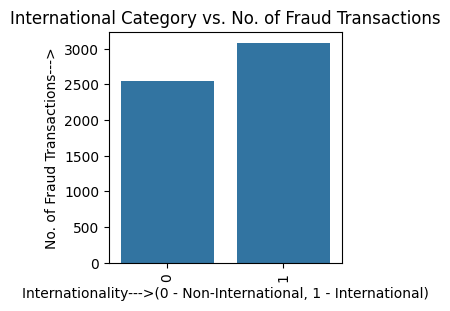

In [180]:
plt.figure(figsize=(3,3))
sns.barplot(x='International',y='No. of Fraud Transactions',data=International_Fraud)
plt.title('International Category vs. No. of Fraud Transactions')
plt.xlabel('Internationality--->(0 - Non-International, 1 - International)')
plt.ylabel('No. of Fraud Transactions--->')
plt.xticks(rotation='vertical')
plt.show()

In [181]:
top_failedtr_fraud=(
    sample_df_Fraud['failed_transactions'].
        value_counts().
        sort_values(ascending=False).
        head()
)
l1 = list(map(int,top_failedtr_fraud.index))
l2 = list(map(int,top_failedtr_fraud.values))

failedtr_Fraud = pd.DataFrame({
    'Failed Transaction': l1,
    'No. of Fraud Transactions': l2
})
failedtr_Fraud

,Failed Transaction,No. of Fraud Transactions
0,1,5339
1,0,289


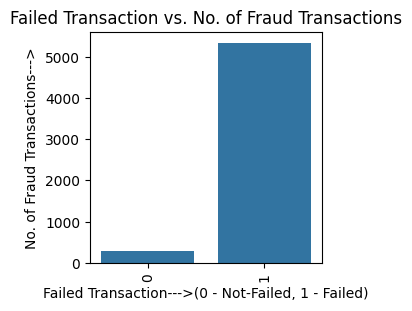

In [182]:
plt.figure(figsize=(3,3))
sns.barplot(x='Failed Transaction',y='No. of Fraud Transactions',data=failedtr_Fraud)
plt.title('Failed Transaction vs. No. of Fraud Transactions')
plt.xlabel('Failed Transaction--->(0 - Not-Failed, 1 - Failed)')
plt.ylabel('No. of Fraud Transactions--->')
plt.xticks(rotation='vertical')
plt.show()

In [183]:
top_trtype_fraud=(
    sample_df_Fraud['transaction_type'].
        value_counts().
        sort_values(ascending=False).
        head()
)
l1 = list(map(int,top_trtype_fraud.index))
l2 = list(map(int,top_trtype_fraud.values))

trtype_Fraud = pd.DataFrame({
    'Transaction Type': l1,
    'No. of Fraud Transactions': l2
})
trtype_Fraud

,Transaction Type,No. of Fraud Transactions
0,3,1597
1,2,1374
2,0,1346
3,1,1311


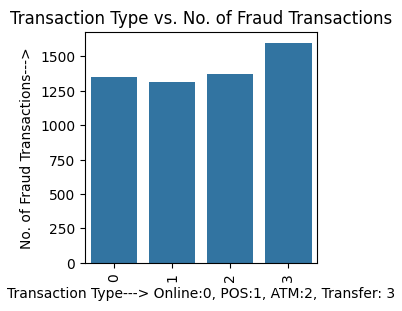

In [184]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.barplot(x='Transaction Type',y='No. of Fraud Transactions',data=trtype_Fraud)
plt.title('Transaction Type vs. No. of Fraud Transactions')
plt.xlabel('Transaction Type---> Online:0, POS:1, ATM:2, Transfer: 3')
plt.ylabel('No. of Fraud Transactions--->')
plt.xticks(rotation='vertical')
plt.show()

In [185]:
top_devtype_fraud=(
    sample_df_Fraud['device_type'].
        value_counts().
        sort_values(ascending=False).
        head()
)
l1 = list(map(int,top_devtype_fraud.index))
l2 = list(map(int,top_devtype_fraud.values))

trdevtype_Fraud = pd.DataFrame({
    'Transaction Device Type': l1,
    'No. of Fraud Transactions': l2
})
trdevtype_Fraud

,Transaction Device Type,No. of Fraud Transactions
0,2,1921
1,1,1862
2,0,1845


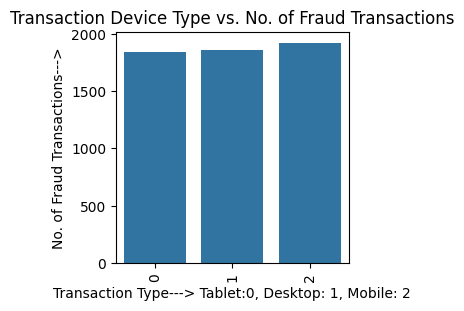

In [186]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.barplot(x='Transaction Device Type',y='No. of Fraud Transactions',data=trdevtype_Fraud)
plt.title('Transaction Device Type vs. No. of Fraud Transactions')
plt.xlabel('Transaction Type---> Tablet:0, Desktop: 1, Mobile: 2')
plt.ylabel('No. of Fraud Transactions--->')
plt.xticks(rotation='vertical')
plt.show()

In [187]:
top_amount_fraud=(
    sample_df_Fraud['amount'].
        value_counts().
        sort_values(ascending=False).
        head(20)
)
l1 = list(map(int,top_amount_fraud.index))
l2 = list(map(int,top_amount_fraud.values))

amount_Fraud = pd.DataFrame({
    'Amount': l1,
    'No. of Fraud Transactions': l2
})
amount_Fraud

,Amount,No. of Fraud Transactions
0,104351,1
1,211864,1
2,280370,1
3,79802,1
4,211166,1
5,266846,1
6,212059,1
7,60121,1
8,162116,1
9,258083,1


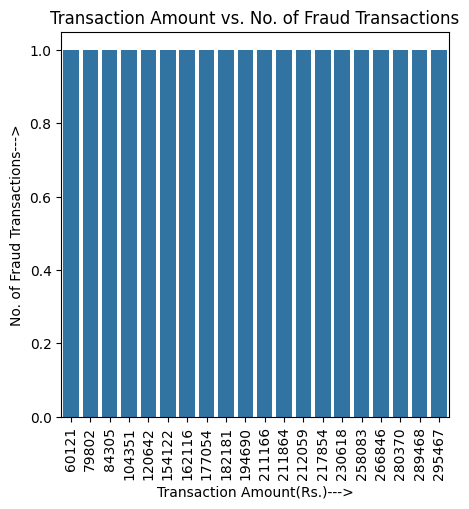

In [188]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.barplot(x='Amount',y='No. of Fraud Transactions',data=amount_Fraud)
plt.title('Transaction Amount vs. No. of Fraud Transactions')
plt.xlabel('Transaction Amount(Rs.)--->')
plt.ylabel('No. of Fraud Transactions--->')
plt.xticks(rotation='vertical')
plt.show()

In [189]:
sample_df[['is_international','user_id_encoded','failed_transactions','transaction_type','device_type']].head()

,is_international,user_id_encoded,failed_transactions,transaction_type,device_type
0,1,155,1,0,0
1,1,561,1,0,1
2,1,225,1,1,0
3,0,227,1,0,0
4,0,43,1,0,1


In [190]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,precision_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [191]:
input_sample = sample_df[['amount',
    'is_international',
    'transaction_type',
    'failed_transactions',
    'device_type',
    'transaction_hour']]
output_sample = sample_df['is_fraud']

#Main Decision Tree Model Building
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(input_sample, output_sample)
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.2,random_state=42)
sc = MinMaxScaler()
train_input = sc.fit_transform(X_train)
test_input = sc.transform(X_test)

In [192]:
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=13,          # Allow deeper patterns
    min_samples_split=7,   # Avoid overfitting
    min_samples_leaf=2,    # Keep leaves meaningful
    max_features=None,     # Use all features
    random_state=15
)
tree_model.fit(train_input,Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,13
,min_samples_split,7
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [193]:
pred = tree_model.predict(test_input)
print(f"Accuracy Score: {accuracy_score(pred,Y_test)*100:.2f}%")
print(f"Precision Score: {precision_score(pred,Y_test)*100:.2f}%")

Accuracy Score: 77.98%
Precision Score: 78.45%


In [194]:
pred_1 = tree_model.predict_proba(test_input)
fraud_pred = pred_1[67][1]
print(f"Risk Score: {fraud_pred * 100:.2f}%")

Risk Score: 52.13%


In [195]:
#Main Random Forest Model Building
from sklearn.ensemble import RandomForestClassifier

In [196]:
rf_model = RandomForestClassifier(
    n_estimators=61,  #61- 79.22%
    criterion='entropy',
    max_depth=13,
    min_samples_split=7,
    min_samples_leaf=2,
    max_features=None, 
    random_state=15, #15 - 79.22%
    bootstrap=True, 
    n_jobs=-1
)
rf_model.fit(train_input, Y_train)

,n_estimators,61
,criterion,'entropy'
,max_depth,13
,min_samples_split,7
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [197]:
pred_rf = rf_model.predict(test_input)
print(f"Accuracy Score: {accuracy_score(pred_rf,Y_test)*100:.2f}%")
print(f"Precision Score: {precision_score(pred_rf,Y_test)*100:.2f}%")

Accuracy Score: 79.22%
Precision Score: 75.38%


In [198]:
in_tr_input = input('Was transaction International? YES or NO ?') #Was transaction International?
if in_tr_input.lower() == 'yes':
    in_tr = 1
else:
    in_tr = 0

in_fail_input = input('Was transaction failed? YES or NO ?') #Was transaction failed?
if in_fail_input.lower() == 'yes':
    in_fail = 1
else:
    in_fail = 0

in_type_input = input('Online or POS or ATM or Transfer: Which transaction type ?') #Select your transaction type-> Online or POS or ATM or Transfer
if in_type_input.lower() == 'online':
    in_type = 0
elif in_type_input.lower() == 'pos':
    in_type = 1
elif in_type_input.lower() == 'atm':
    in_type = 2
elif in_type_input.lower() == 'transfer':
    in_type = 3

in_dev_input = input('Tablet or Computer or Mobile: Which device ?') #Select your device-> Tablet or Computer or Mobile
if in_dev_input.lower() == 'tablet':
    in_dev = 0
elif in_dev_input.lower() == 'computer':
    in_dev = 1
elif in_dev_input.lower() == 'mobile':
    in_dev = 2

in_amount_input = input('Enter Amount: ') #Enter Your Amount
if in_amount_input == '' or in_amount_input is None:
    print('Null Value Entered!')
elif int(in_amount_input) < 0:
    print('Enter Positive Value!')
else:
    in_amount = int(in_amount_input)

in_hour_input = input('Enter Transaction Hour(0-23): ')
if in_hour_input == '' or in_amount_input is None:
    print('Null Value Entered!')
elif int(in_amount_input) < 0:
    print('Enter Positive Value!')
else:
    in_hour = int(in_hour_input)

prediction_input = np.array([[in_amount,in_tr,in_type,in_fail,in_dev,in_hour]])

pred_out = tree_model.predict(prediction_input)
pred_out_1 = tree_model.predict_proba(prediction_input)
if pred_out.astype(int) == 1:
    print("Possibly Fraud!")
else:
    print("Possibly Safe!")
print(f"Risk Score: {pred_out_1[0][1]*100:.2f}%")

Was transaction International? YES or NO ? yes
Was transaction failed? YES or NO ? yes
Online or POS or ATM or Transfer: Which transaction type ? online
Tablet or Computer or Mobile: Which device ? tablet
Enter Amount:  7600
Enter Transaction Hour(0-23):  15


Possibly Fraud!
Risk Score: 100.00%


In [200]:
import pickle
pickle.dump(rf_model,open('fraud_detector_D_T.pkl','wb'))